In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

fruits = pd.read_table("fruit_data_with_colors.txt")



In [2]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


## Create train - test split

In [3]:
X = fruits[["mass", "width", "height", "color_score"]]
y = fruits["fruit_label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


C:\Users\mohka\AppData\Local\Temp\ipykernel_8836\1351084468.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gnuplot')


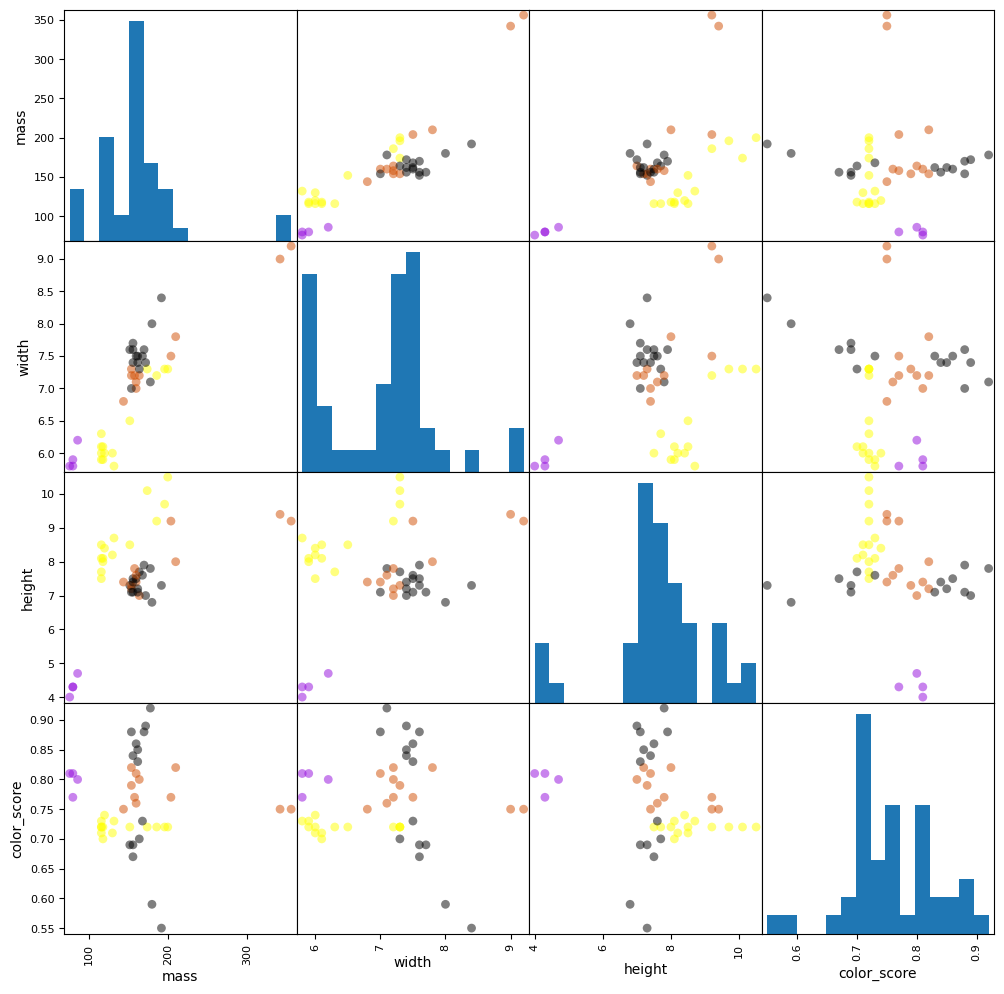

In [4]:
%matplotlib inline
from matplotlib import cm

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c = y_train, marker="o", s=40, hist_kwds={'bins':15}, figsize=(12, 12), cmap = cmap)

In [5]:
from mpl_toolkits.mplot3d import Axes3D

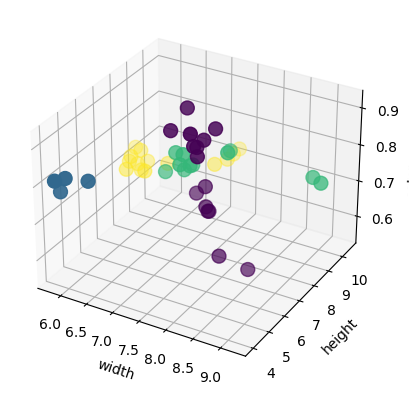

In [6]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train,  marker='o', s=100)
ax.set_xlabel("width")
ax.set_ylabel("height")
ax.set_zlabel("color score")
plt.show()

In [8]:
X = fruits[["mass", "width", "height"]]
y = fruits["fruit_label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


In [9]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

## Create classifier object

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
knn.score(X_test, y_test)

0.5333333333333333

In [18]:
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

C:\Users\mohka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'mandarin'

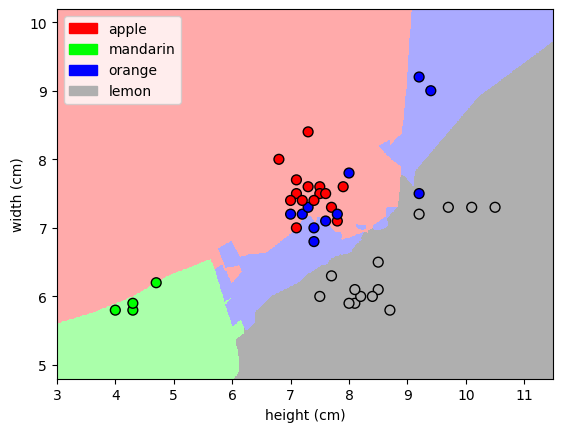

In [26]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 10, 'uniform')